In [12]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sequential read
First, we compare the time taken for a sequential read of a video. We use the `sequential_compare.py` script for this.

In [13]:
# FILE_TO_READ = join("./out/", "READ_RANDOM_SEEK.csv")
FILE_TO_READ = join("./out/", "READ_ENTIRE_VID.csv")
# FILE_TO_READ = join("./out/", "READ_UNIFORM_SEEK.csv")


In [14]:
df = pd.read_csv(FILE_TO_READ)
df["time_per_frame"] = df['time'] / df['num_frames']
df.head(5)


,Unnamed: 0,decoder,video,time,num_frames,num_threads,codec,time_per_frame
0,0,decord_cpu,WUzgd7C1pWA,0.089853,327,1,original,0.000275
1,1,tv_newAPI,WUzgd7C1pWA,0.150779,327,1,original,0.000461
2,2,pyav,WUzgd7C1pWA,0.185106,327,1,original,0.000566
3,3,tv_vr,WUzgd7C1pWA,0.176335,327,1,original,0.000539
4,4,tv_pyav,WUzgd7C1pWA,0.232008,327,1,original,0.000710


### Original videos
First we check overall time on original videos

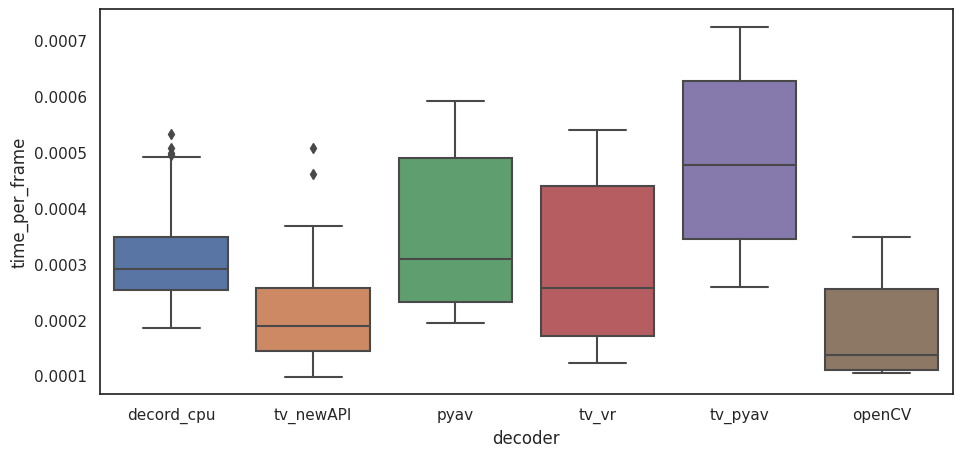

In [15]:
sns.set_style("white")
df_curr = df[df['codec'] == 'original']

ax = sns.boxplot(x="decoder", y="time_per_frame", data=df_curr)


### Does number of threads matter? 

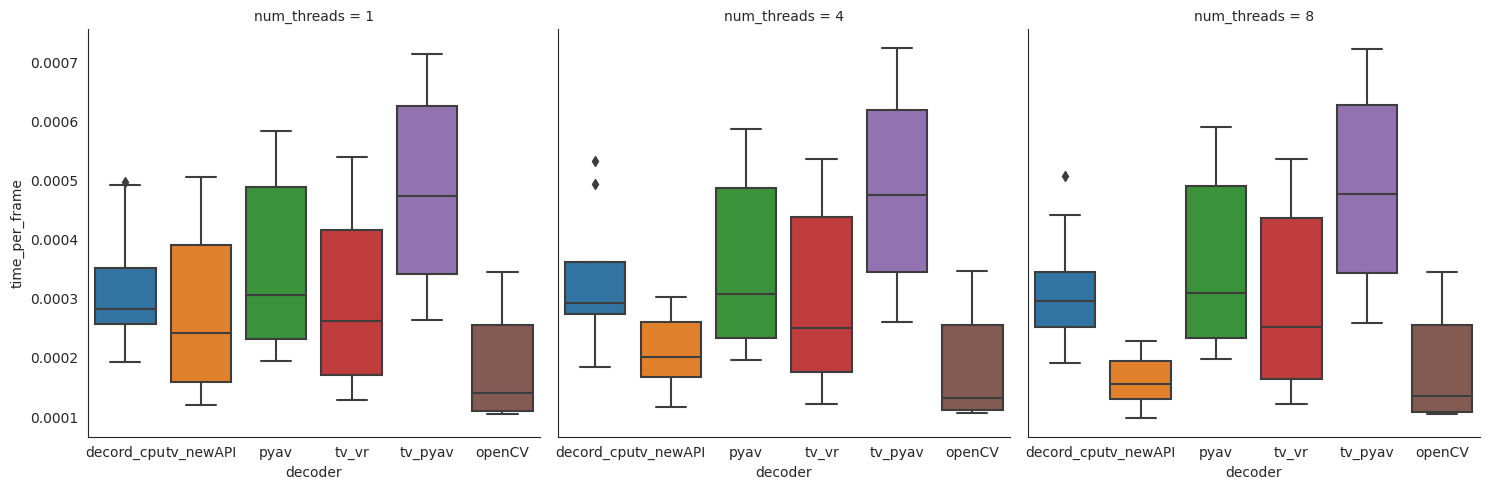

In [5]:
sns.set_style("white")
ax = sns.catplot(x="decoder", y="time_per_frame", col="num_threads", kind="box", data=df_curr)

Can we see differences if we examine individual videos? 
(assuming original codecs)

/home/bjuncek/.conda/envs/vb/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


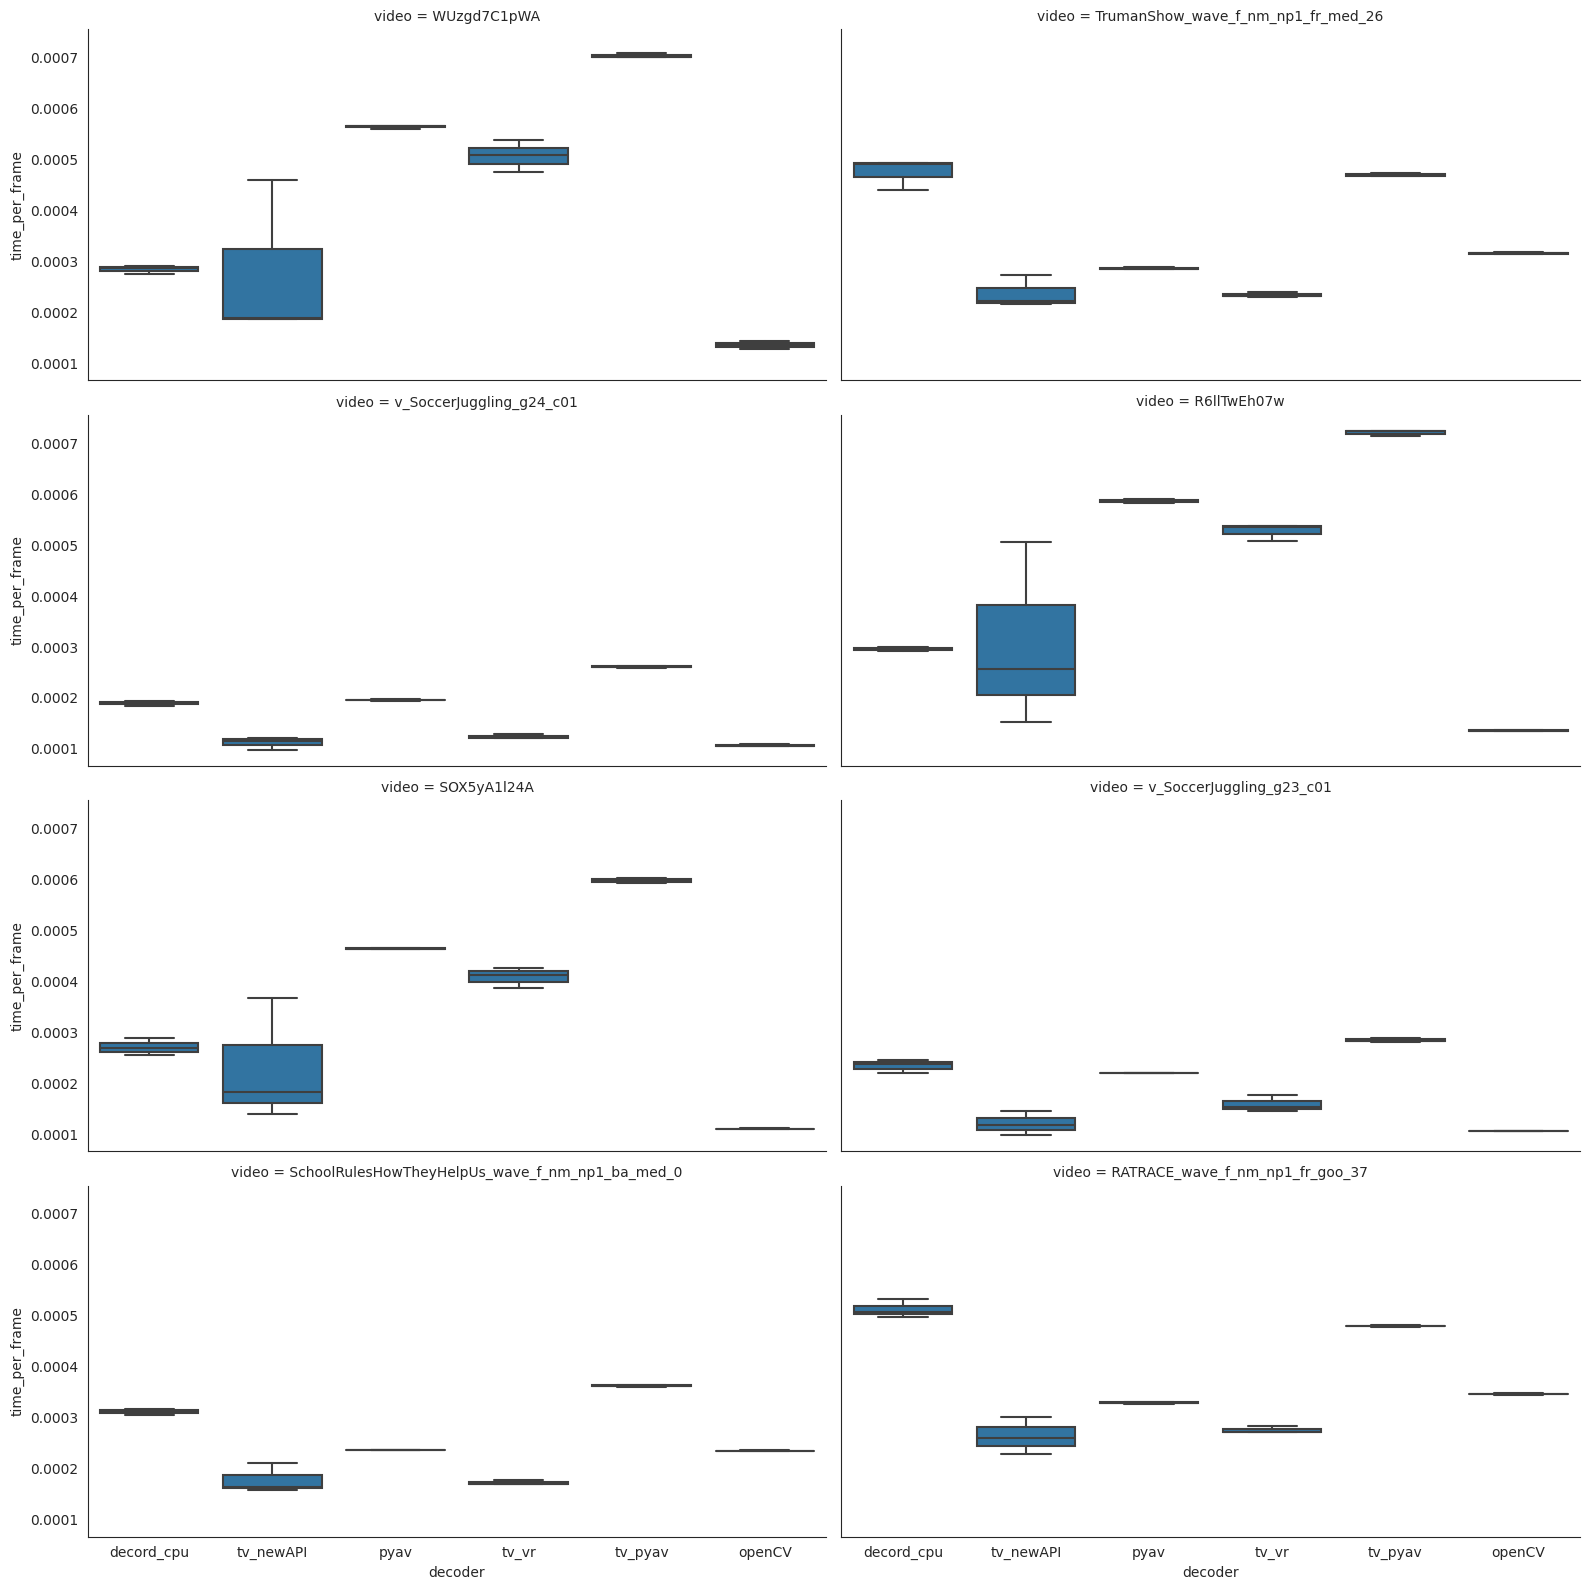

In [6]:
sns.set_style("white")

g = sns.FacetGrid(df_curr, col="video", col_wrap=2, height=4, aspect=2, sharey=True)
g = g.map(sns.boxplot, "decoder", "time_per_frame", showfliers = False)


### And how about the encoding of the videos? 
(averaged over all number of threads)

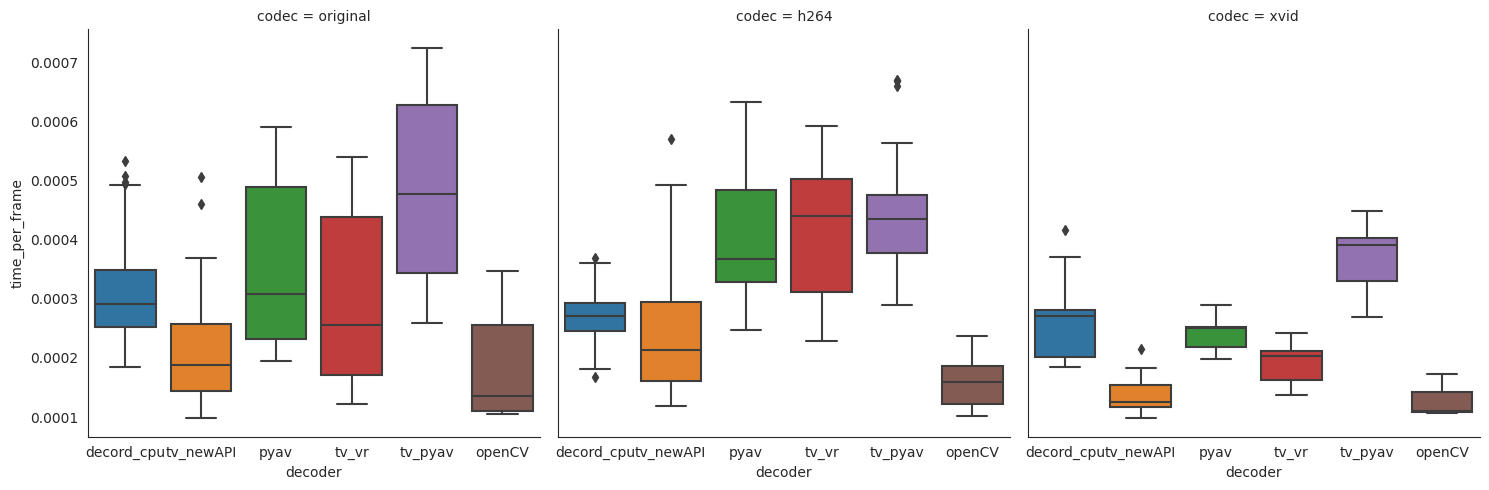

In [7]:
sns.set_style("white")
ax = sns.catplot(x="decoder", y="time_per_frame", col="codec", kind="box", data=df)

or even better? 

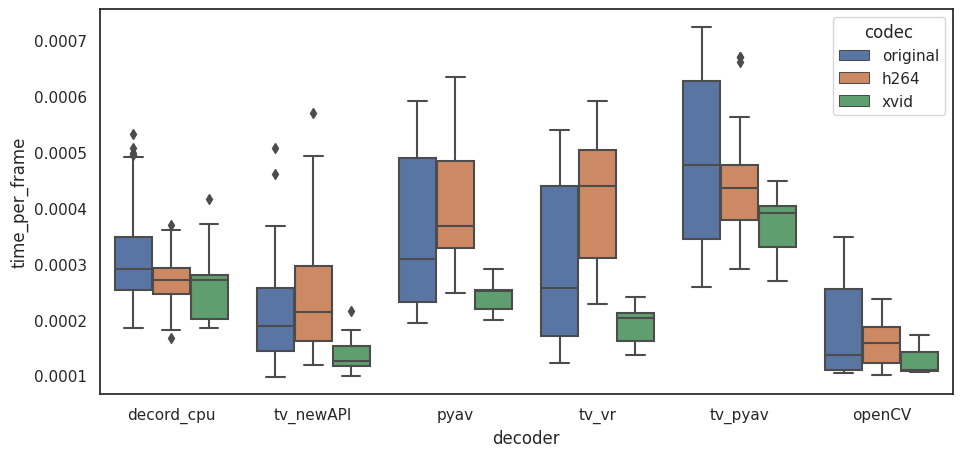

In [8]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_style("white")


ax = sns.boxplot(x="decoder", y="time_per_frame", hue='codec', data=df)


/home/bjuncek/.conda/envs/vb/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


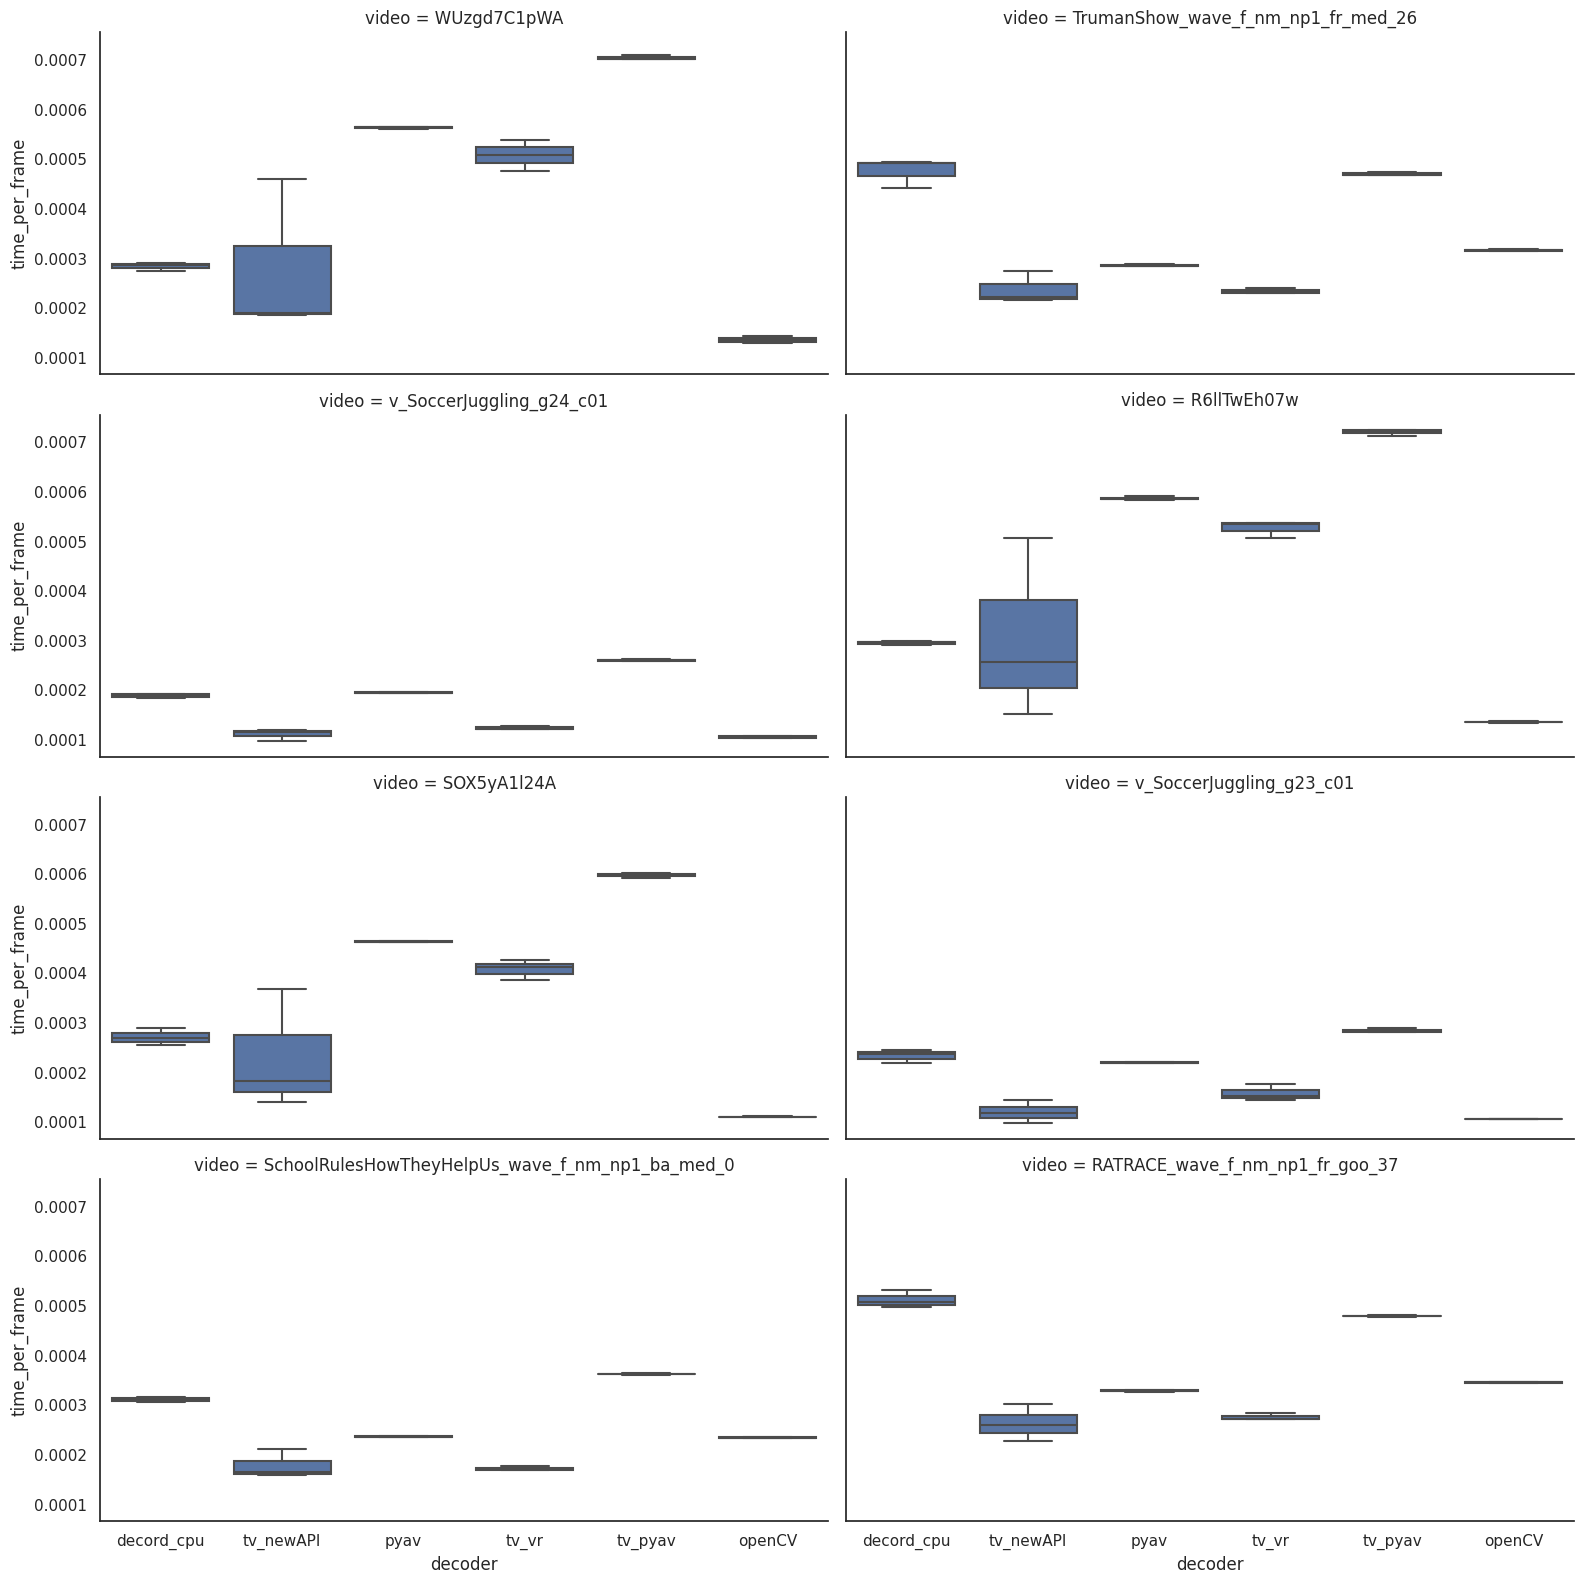

In [21]:
sns.set_style("white")
df_curr = df[df['codec'] == 'original']
g = sns.FacetGrid(df_curr, col="video", col_wrap=2, height=4, aspect=2, sharey=True)
g = g.map(sns.boxplot, "decoder", "time_per_frame", showfliers = False)


/home/bjuncek/.conda/envs/vb/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


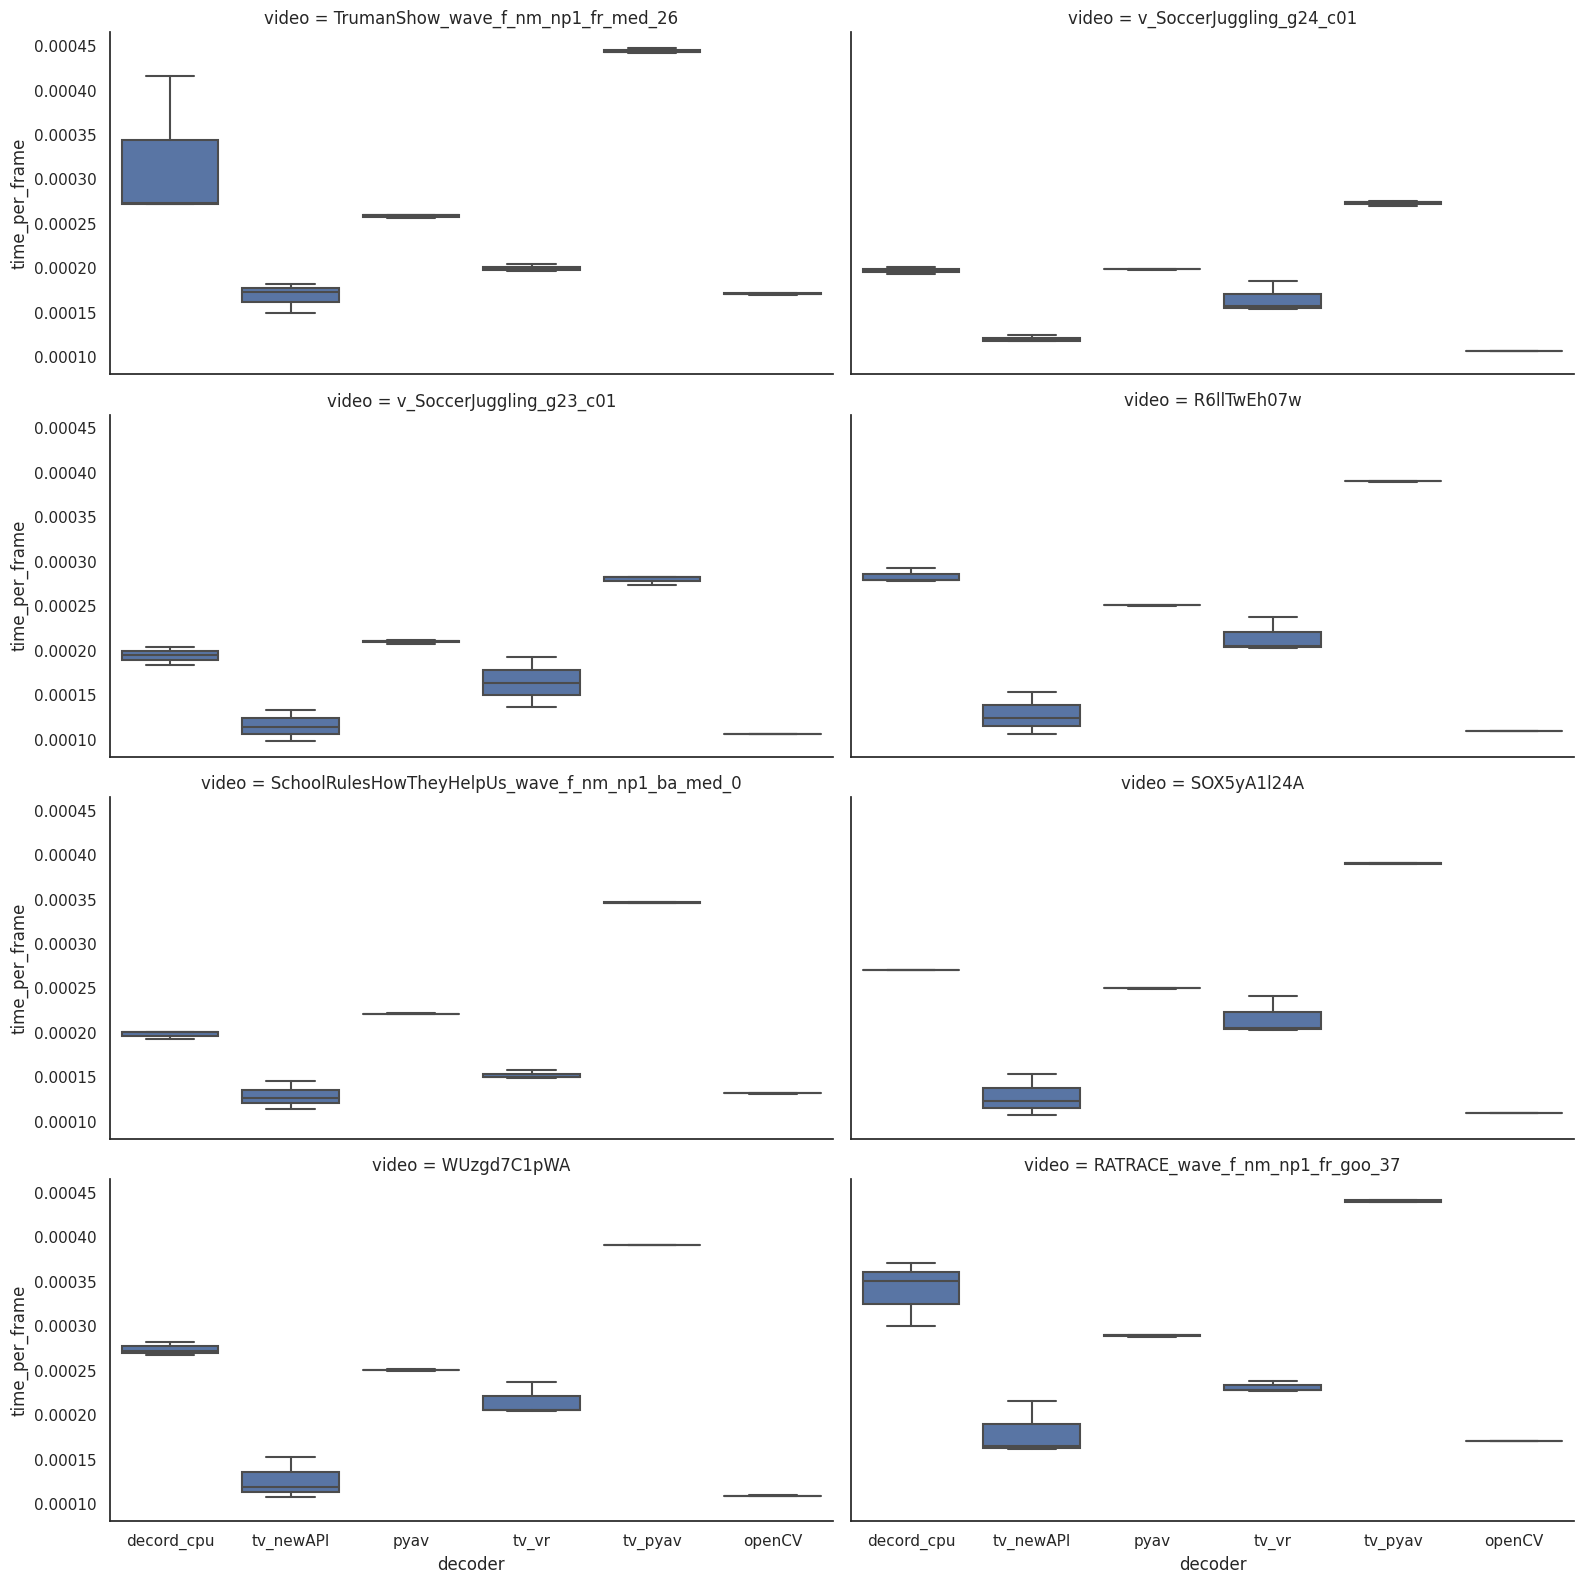

In [23]:
sns.set_style("white")
df_curr = df[df['codec'] == 'xvid']
g = sns.FacetGrid(df_curr, col="video", col_wrap=2, height=4, aspect=2, sharey=True)
g = g.map(sns.boxplot, "decoder", "time_per_frame", showfliers = False)

# Random seedings
Now we compare the time taken for random seedings of a video. We use the `random_compare.py` script for this. Numbers are reported by extracting 3 non-sorted clips of k frames from each video, and each measurement is averaged over 10 runs.

In [24]:
FILE_TO_READ = join("./out/", "READ_RANDOM_SEEK.csv")
df = pd.read_csv(FILE_TO_READ)
df["time_per_frame"] = df['time'] / df['num_frames']
df.head(5)

,Unnamed: 0,decoder,video,time,num_frames,num_threads,codec,time_per_frame
0,0,pyav,WUzgd7C1pWA.mp4,0.137763,1,1,original,0.137763
1,1,tv_newapi,WUzgd7C1pWA.mp4,0.147952,1,1,original,0.147952
2,2,decord,WUzgd7C1pWA.mp4,0.034518,1,1,original,0.034518
3,3,pyav,WUzgd7C1pWA.mp4,0.144169,5,1,original,0.028834
4,4,tv_newapi,WUzgd7C1pWA.mp4,0.153721,5,1,original,0.030744


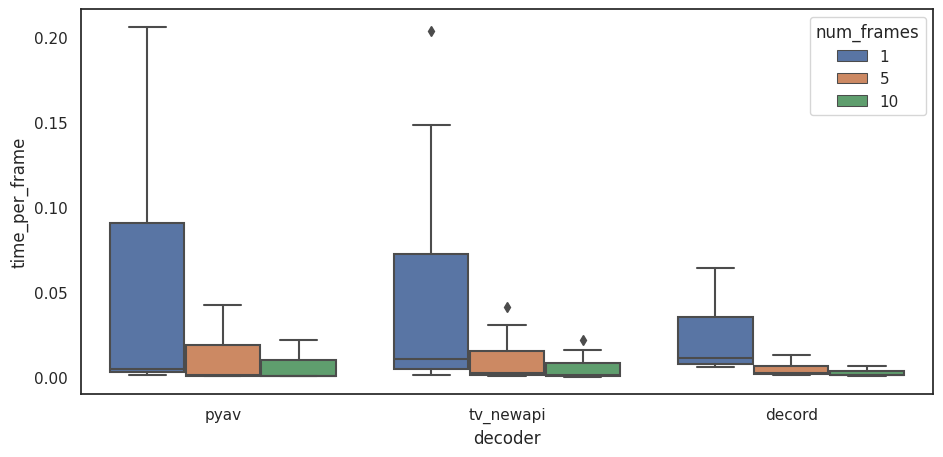

In [25]:
sns.set_style("white")
df_curr = df[df['codec'] == 'original']

ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_frames", data=df_curr)

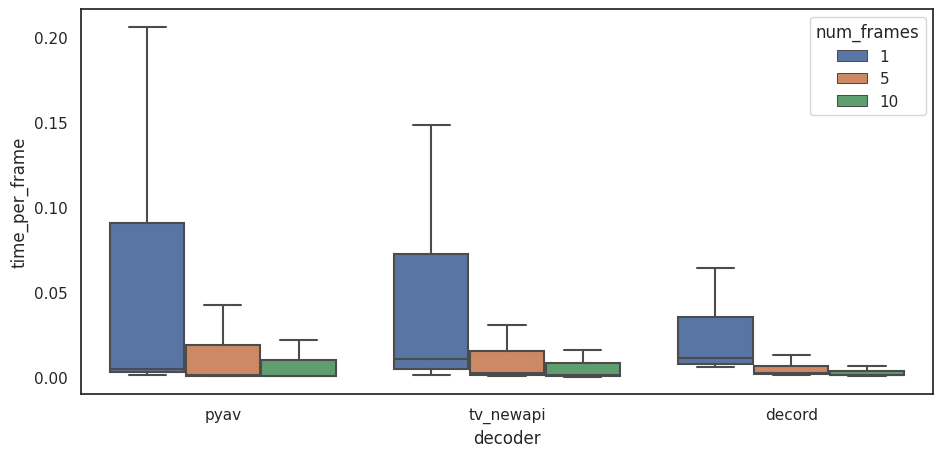

In [26]:
sns.set_style("white")
ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_frames", data=df_curr, showfliers = False)

## Num threads for 5 frame clips

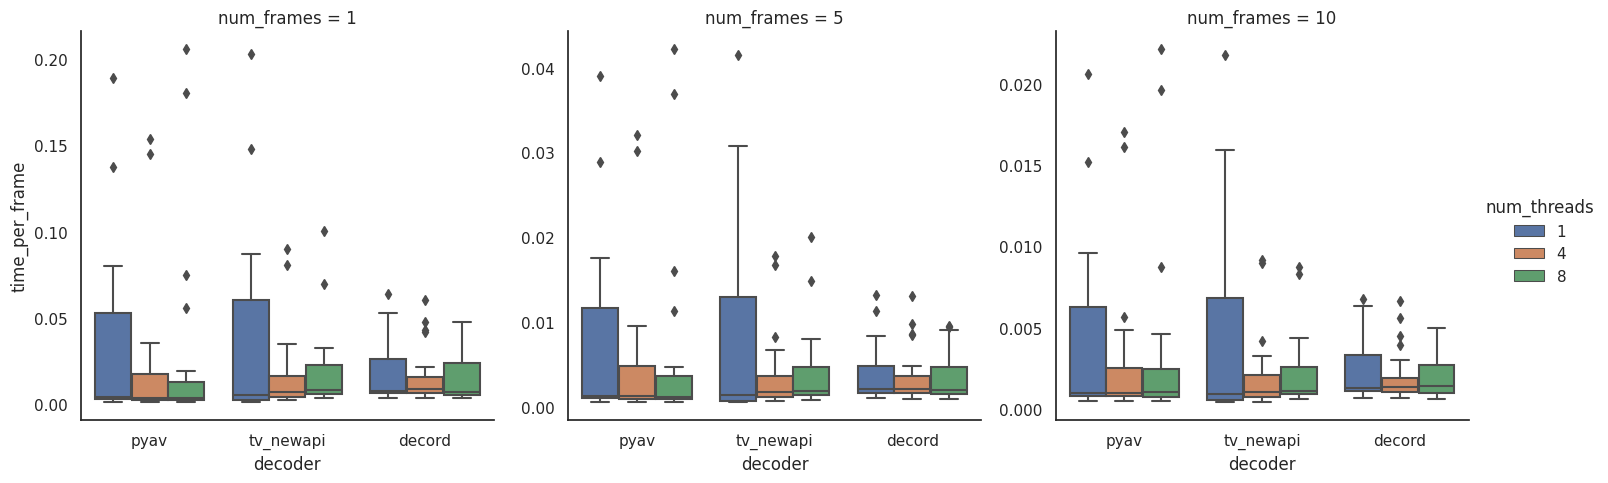

In [28]:
df_curr = df_curr[df_curr['num_frames'] == 5]

# ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_threads", data=df_curr, showfliers = False)
ax = sns.catplot(x="decoder", y="time_per_frame", hue="num_threads", col="num_frames", kind="box", data=df, sharey=False)

Finally, let's see the breakdown per codec as well?

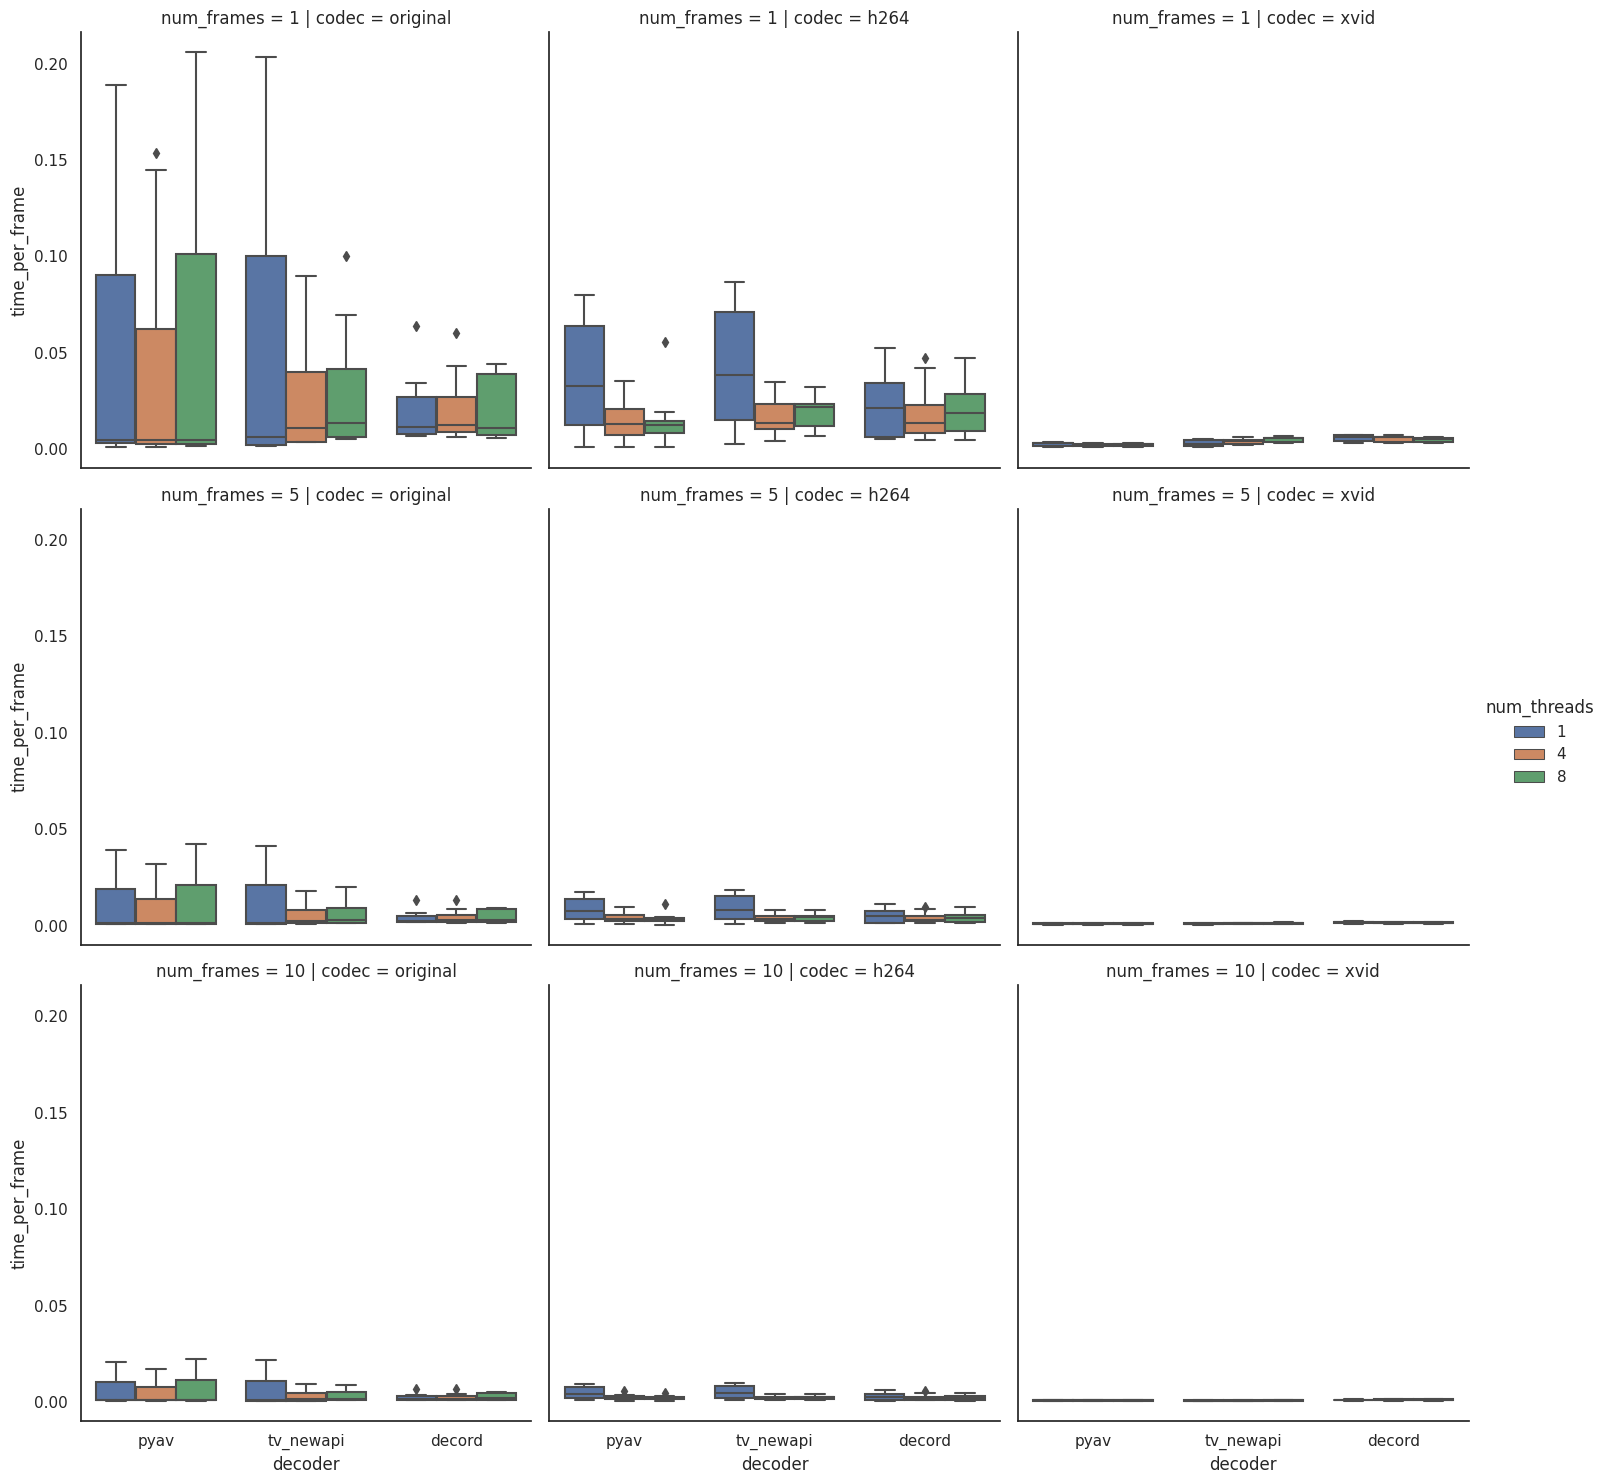

In [35]:
sns.set(rc={'figure.figsize':(13,5)})
sns.set_style("white")
ax = sns.catplot(x="decoder", y="time_per_frame", hue="num_threads", row="num_frames", col='codec', kind="box", data=df, sharey=False)